## Data Cleaning and EDA

In [ ]:
!pip install Groq pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 5.3 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
import pandas as pd
import os
from financial_chatbot import FinancialChatbot

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d pradeepkumar2424/usa-banking-transactions-dataset-2023-2024

! unzip "usa-banking-transactions-dataset-2023-2024.zip"

Dataset URL: https://www.kaggle.com/datasets/pradeepkumar2424/usa-banking-transactions-dataset-2023-2024
License(s): CC0-1.0
  0% 0.00/580k [00:00<?, ?B/s]
100% 580k/580k [00:00<00:00, 1.01GB/s]
Archive:  usa-banking-transactions-dataset-2023-2024.zip
  inflating: Banking_Transactions_USA_2023_2024.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from financial_chatbot import FinancialChatbot

In [ ]:
df = pd.read_csv('/content/Banking_Transactions_USA_2023_2024.csv')
display(df.info(),
        df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5389 entries, 0 to 5388
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Transaction_ID           5389 non-null   object 
 1   Account_Number           5389 non-null   object 
 2   Transaction_Date         5389 non-null   object 
 3   Transaction_Amount       5389 non-null   float64
 4   Merchant_Name            5389 non-null   object 
 5   Transaction_Type         5389 non-null   object 
 6   Category                 5389 non-null   object 
 7   City                     5389 non-null   object 
 8   Country                  5389 non-null   object 
 9   Payment_Method           5389 non-null   object 
 10  Customer_Age             5389 non-null   int64  
 11  Customer_Gender          5389 non-null   object 
 12  Customer_Occupation      5389 non-null   object 
 13  Customer_Income          5389 non-null   float64
 14  Account_Balance         

None

,Transaction_ID,Account_Number,Transaction_Date,Transaction_Amount,Merchant_Name,Transaction_Type,Category,City,Country,Payment_Method,Customer_Age,Customer_Gender,Customer_Occupation,Customer_Income,Account_Balance,Transaction_Status,Fraud_Flag,Discount_Applied,Loyalty_Points_Earned,Transaction_Description
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,IUPM04409079772781,2023-11-05 15:54:38,3198.94,Houston Group,Debit,Transport,Phoenix,USA,Online Transfer,55,Others,Quality manager,80466.03,350.28,Failed,No,True,304,Recently company detail form range a.
1,23b8c1e9-3924-46de-beb1-3b9046685257,BLAT22216107051843,2024-04-21 22:21:55,129.93,Anderson-Phillips,Credit,Grocery,Philadelphia,USA,Debit Card,26,Others,Civil Service fast streamer,145574.25,9797.81,Pending,Yes,False,383,Anything son baby power heart will not up.
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,UTXA55295806601382,2023-07-17 13:25:56,1378.77,Jensen Group,Credit,Shopping,New York,USA,Debit Card,29,Others,"Pilot, airline",33447.18,12399.85,Failed,Yes,False,497,Form world around green bar environment pattern.
3,972a8469-1641-4f82-8b9d-2434e465e150,XICF70493862044851,2023-06-27 16:09:52,1119.94,"Nelson, Gomez and Rodriguez",Credit,Healthcare,Dallas,USA,Online Transfer,60,Male,"Radiographer, therapeutic",108801.45,16057.64,Failed,Yes,True,495,Order evening source these opportunity trade i...
4,17fc695a-07a0-4a6e-8822-e8f36c031199,KOSW19711121259020,2024-03-26 23:45:31,3683.67,Caldwell Group,Credit,Entertainment,San Jose,USA,E-Wallet,29,Others,Diplomatic Services operational officer,100985.12,14940.54,Failed,Yes,True,292,Exactly politics door suggest.


In [ ]:
#modify column names to all lowercase
df.columns = df.columns.str.lower()
df.head()

,transaction_id,account_number,transaction_date,transaction_amount,merchant_name,transaction_type,category,city,country,payment_method,customer_age,customer_gender,customer_occupation,customer_income,account_balance,transaction_status,fraud_flag,discount_applied,loyalty_points_earned,transaction_description
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,IUPM04409079772781,2023-11-05 15:54:38,3198.94,Houston Group,Debit,Transport,Phoenix,USA,Online Transfer,55,Others,Quality manager,80466.03,350.28,Failed,No,True,304,Recently company detail form range a.
1,23b8c1e9-3924-46de-beb1-3b9046685257,BLAT22216107051843,2024-04-21 22:21:55,129.93,Anderson-Phillips,Credit,Grocery,Philadelphia,USA,Debit Card,26,Others,Civil Service fast streamer,145574.25,9797.81,Pending,Yes,False,383,Anything son baby power heart will not up.
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,UTXA55295806601382,2023-07-17 13:25:56,1378.77,Jensen Group,Credit,Shopping,New York,USA,Debit Card,29,Others,"Pilot, airline",33447.18,12399.85,Failed,Yes,False,497,Form world around green bar environment pattern.
3,972a8469-1641-4f82-8b9d-2434e465e150,XICF70493862044851,2023-06-27 16:09:52,1119.94,"Nelson, Gomez and Rodriguez",Credit,Healthcare,Dallas,USA,Online Transfer,60,Male,"Radiographer, therapeutic",108801.45,16057.64,Failed,Yes,True,495,Order evening source these opportunity trade i...
4,17fc695a-07a0-4a6e-8822-e8f36c031199,KOSW19711121259020,2024-03-26 23:45:31,3683.67,Caldwell Group,Credit,Entertainment,San Jose,USA,E-Wallet,29,Others,Diplomatic Services operational officer,100985.12,14940.54,Failed,Yes,True,292,Exactly politics door suggest.


In [ ]:
#try to understand the users
#count number of account numbers
#cretae a customer_df
#find customer_age, customer_gender, customer_occupation and customer_income distribution
cust_df = df.groupby("account_number")[['customer_age', 'customer_gender', 'customer_occupation', 'customer_income']].apply(lambda x: x).reset_index()
cust_df.head()

,account_number,level_1,customer_age,customer_gender,customer_occupation,customer_income
0,AAGF56964741331151,2805,32,Others,"Sound technician, broadcasting/film/video",117819.25
1,AAHF65030524114207,2697,58,Female,"Conservator, museum/gallery",109834.12
2,AAJK21289915114551,249,49,Others,Materials engineer,87552.61
3,AANF38183924516791,2950,34,Female,Child psychotherapist,131361.80
4,AASV46584639248878,2019,21,Others,Local government officer,52507.80


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5389 entries, 0 to 5388
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   account_number       5389 non-null   object 
 1   level_1              5389 non-null   int64  
 2   customer_age         5389 non-null   int64  
 3   customer_gender      5389 non-null   object 
 4   customer_occupation  5389 non-null   object 
 5   customer_income      5389 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 252.7+ KB


<Axes: xlabel='customer_gender', ylabel='count'>

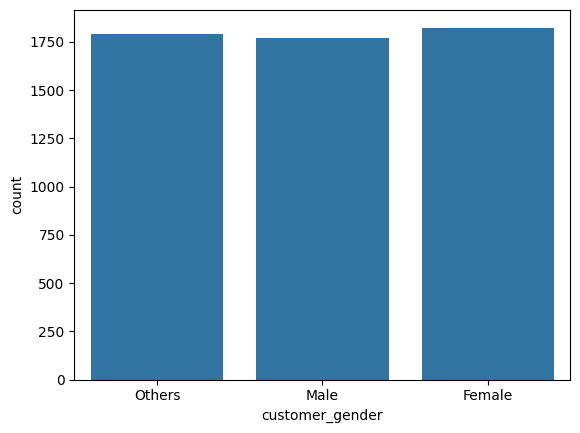

In [ ]:
#plot distribution of age, gender, income using seaborn
sns.countplot(x='customer_gender', data=df)

<Axes: xlabel='customer_age', ylabel='Count'>

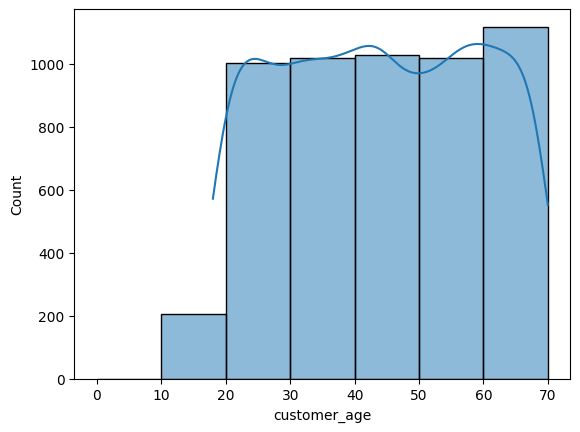

In [ ]:
sns.histplot(
    data=df,
    x="customer_age",
    kde=True,  # Add a KDE curve
    bins=[0, 10, 20, 30, 40,50,60,70],  # Specify the number of bins
    edgecolor="black" # Add black edges to the bars
)

<Axes: xlabel='customer_income', ylabel='Count'>

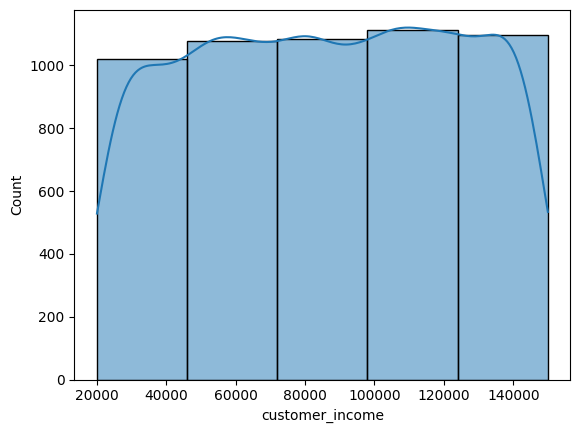

In [ ]:
sns.histplot(
    data=df,
    x="customer_income",
    kde=True,  # Add a KDE curve
    bins=5,  # Specify the number of bins
    edgecolor="black" # Add black edges to the bars
)

In [ ]:
occupation = cust_df['customer_occupation'].value_counts().to_frame()
occupation.to_csv("occupation.csv")

In [ ]:
df['customer_occupation'] = df['customer_occupation'].str.lower()
df['customer_occupation'] = df['customer_occupation'].str.replace(", ", " ")
df['customer_occupation'] = df['customer_occupation'].str.replace("/", " ")
df.head()

,transaction_id,account_number,transaction_date,transaction_amount,merchant_name,transaction_type,category,city,country,payment_method,customer_age,customer_gender,customer_occupation,customer_income,account_balance,transaction_status,fraud_flag,discount_applied,loyalty_points_earned,transaction_description
0,bdd640fb-0667-4ad1-9c80-317fa3b1799d,IUPM04409079772781,2023-11-05 15:54:38,3198.94,Houston Group,Debit,Transport,Phoenix,USA,Online Transfer,55,Others,quality manager,80466.03,350.28,Failed,No,True,304,Recently company detail form range a.
1,23b8c1e9-3924-46de-beb1-3b9046685257,BLAT22216107051843,2024-04-21 22:21:55,129.93,Anderson-Phillips,Credit,Grocery,Philadelphia,USA,Debit Card,26,Others,civil service fast streamer,145574.25,9797.81,Pending,Yes,False,383,Anything son baby power heart will not up.
2,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,UTXA55295806601382,2023-07-17 13:25:56,1378.77,Jensen Group,Credit,Shopping,New York,USA,Debit Card,29,Others,pilot airline,33447.18,12399.85,Failed,Yes,False,497,Form world around green bar environment pattern.
3,972a8469-1641-4f82-8b9d-2434e465e150,XICF70493862044851,2023-06-27 16:09:52,1119.94,"Nelson, Gomez and Rodriguez",Credit,Healthcare,Dallas,USA,Online Transfer,60,Male,radiographer therapeutic,108801.45,16057.64,Failed,Yes,True,495,Order evening source these opportunity trade i...
4,17fc695a-07a0-4a6e-8822-e8f36c031199,KOSW19711121259020,2024-03-26 23:45:31,3683.67,Caldwell Group,Credit,Entertainment,San Jose,USA,E-Wallet,29,Others,diplomatic services operational officer,100985.12,14940.54,Failed,Yes,True,292,Exactly politics door suggest.


In [ ]:
df['customer_occupation'].value_counts().reset_index()

,customer_occupation,count
0,child psychotherapist,18
1,gaffer,18
2,chemist analytical,17
3,contractor,16
4,designer fashion clothing,16
...,...,...
634,hydrographic surveyor,2
635,surveyor planning and development,2
636,development worker community,2
637,therapist drama,2


In [ ]:
#used LLM to classify the roles into industries
occ_w_industry = pd.read_csv("occupation_with_industry.csv")
occ_w_industry.head()

FileNotFoundError: [Errno 2] No such file or directory: 'occupation_with_industry.csv'

In [ ]:
#merge this with df to add industry
display(df.shape)
df = df.merge(occ_w_industry, on='customer_occupation', how='left')
display(df.shape)
df.head()

In [ ]:
df['category'].value_counts().shape

## ML Model for Transaction Classification

In [ ]:

def prepare_data_for_random_forest(df, target_column='category'):
    """
    Complete preprocessing pipeline for Random Forest classification

    Parameters:
    -----------
    df : pandas DataFrame
        Your input dataframe
    target_column : str
        Name of the target variable column (default: 'category')
        This is a multi-class classification with 14 different categories

    Returns:
    --------
    X_train, X_test, y_train, y_test : Training and testing sets
    feature_names : List of feature names
    label_encoders : Dictionary of label encoders for categorical variables
    """

    # Make a copy to avoid modifying original
    df_processed = df.copy()

    print("=" * 60)
    print("STEP 1: HANDLE TARGET VARIABLE (Multi-Class)")
    print("=" * 60)

    # Extract target variable (14 different categories)
    y = df_processed[target_column]

    print(f"Number of unique classes: {y.nunique()}")
    print(f"Class distribution:")
    print(y.value_counts().sort_index())

    # Encode target variable (category labels to integers 0-13)
    le_target = LabelEncoder()
    y_encoded = le_target.fit_transform(y)
    print(f"\nTarget variable encoded:")
    for i, class_name in enumerate(le_target.classes_):
        print(f"  {class_name} -> {i}")

    # Drop target variable from features
    df_processed = df_processed.drop(columns=[target_column])

    print("\n" + "=" * 60)
    print("STEP 2: REMOVE IRRELEVANT COLUMNS")
    print("=" * 60)

    # Remove ID columns and description fields (usually not useful for prediction)
    columns_to_drop = [
        'transaction_id',           # Unique identifier, no predictive value
        'account_number',            # Unique identifier
        'transaction_description'    # Free text, requires NLP processing
    ]

    existing_drops = [col for col in columns_to_drop if col in df_processed.columns]
    df_processed = df_processed.drop(columns=existing_drops)
    print(f"Dropped columns: {existing_drops}")

    print("\n" + "=" * 60)
    print("STEP 3: HANDLE DATETIME COLUMNS")
    print("=" * 60)

    # Extract useful features from datetime
    if 'transaction_date' in df_processed.columns:
        # Convert to datetime if it's string
        df_processed['transaction_date'] = pd.to_datetime(df_processed['transaction_date'])

        # Extract useful temporal features
        df_processed['transaction_year'] = df_processed['transaction_date'].dt.year
        df_processed['transaction_month'] = df_processed['transaction_date'].dt.month
        df_processed['transaction_day'] = df_processed['transaction_date'].dt.day
        df_processed['transaction_dayofweek'] = df_processed['transaction_date'].dt.dayofweek
        df_processed['transaction_hour'] = df_processed['transaction_date'].dt.hour
        df_processed['transaction_quarter'] = df_processed['transaction_date'].dt.quarter
        df_processed['is_weekend'] = (df_processed['transaction_date'].dt.dayofweek >= 5).astype(int)

        # Drop original datetime column
        df_processed = df_processed.drop(columns=['transaction_date'])
        print("Extracted datetime features: year, month, day, dayofweek, hour, quarter, is_weekend")

    print("\n" + "=" * 60)
    print("STEP 4: HANDLE BOOLEAN COLUMNS")
    print("=" * 60)

    # Convert boolean to int (Random Forest can handle this)
    bool_columns = df_processed.select_dtypes(include=['bool']).columns
    for col in bool_columns:
        df_processed[col] = df_processed[col].astype(int)
    print(f"Converted boolean columns to int: {list(bool_columns)}")

    print("\n" + "=" * 60)
    print("STEP 5: HANDLE CATEGORICAL VARIABLES")
    print("=" * 60)

    # Identify categorical columns
    categorical_columns = df_processed.select_dtypes(include=['object']).columns.tolist()
    print(f"Categorical columns found: {categorical_columns}")

    # Store label encoders for potential inverse transformation later
    label_encoders = {}

    # METHOD 1: Label Encoding (for ordinal or low-cardinality features)
    # Use for binary categories or ordered categories
    label_encode_cols = ['customer_gender', 'transaction_status', 'payment_method']
    label_encode_cols = [col for col in label_encode_cols if col in categorical_columns]

    for col in label_encode_cols:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
        print(f"  Label Encoded '{col}': {dict(zip(le.classes_, le.transform(le.classes_)))}")

    # METHOD 2: One-Hot Encoding (for nominal features with moderate cardinality)
    # Use for unordered categories with reasonable number of unique values
    # Note: 'category' is now the target variable, so it's already removed
    onehot_cols = [col for col in categorical_columns if col not in label_encode_cols]

    # For high-cardinality columns, consider frequency encoding or target encoding instead
    high_cardinality_threshold = 50
    high_cardinality_cols = []

    for col in onehot_cols[:]:  # Create copy of list to modify during iteration
        n_unique = df_processed[col].nunique()
        if n_unique > high_cardinality_threshold:
            high_cardinality_cols.append(col)
            onehot_cols.remove(col)
            print(f"  '{col}' has {n_unique} unique values - will use frequency encoding")

    # Apply One-Hot Encoding for remaining categorical columns
    if onehot_cols:
        df_processed = pd.get_dummies(df_processed, columns=onehot_cols, prefix=onehot_cols, drop_first=True)
        print(f"  One-Hot Encoded columns: {onehot_cols}")

    # METHOD 3: Frequency Encoding for high-cardinality columns
    for col in high_cardinality_cols:
        freq_encoding = df_processed[col].value_counts(normalize=True).to_dict()
        df_processed[f'{col}_frequency'] = df_processed[col].map(freq_encoding)
        df_processed = df_processed.drop(columns=[col])
        print(f"  Frequency Encoded '{col}'")

    print("\n" + "=" * 60)
    print("STEP 6: HANDLE MISSING VALUES (if any)")
    print("=" * 60)

    missing_counts = df_processed.isnull().sum()
    if missing_counts.sum() > 0:
        print("Missing values found:")
        print(missing_counts[missing_counts > 0])

        # Fill numerical columns with median
        numerical_cols = df_processed.select_dtypes(include=[np.number]).columns
        for col in numerical_cols:
            if df_processed[col].isnull().sum() > 0:
                df_processed[col].fillna(df_processed[col].median(), inplace=True)
    else:
        print("No missing values found!")

    print("\n" + "=" * 60)
    print("STEP 7: FEATURE SCALING (Optional but Recommended)")
    print("=" * 60)

    # Random Forest doesn't require scaling, but it can help with interpretation
    # and if you want to use feature importance later
    # Uncomment the following if you want to scale:

    # scaler = StandardScaler()
    # numerical_cols = df_processed.select_dtypes(include=[np.number]).columns
    # df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])
    # print(f"Scaled {len(numerical_cols)} numerical columns")

    print("Scaling skipped (not required for Random Forest)")

    print("\n" + "=" * 60)
    print("STEP 8: FINAL DATASET SUMMARY")
    print("=" * 60)

    X = df_processed
    feature_names = X.columns.tolist()

    print(f"Total features: {X.shape[1]}")
    print(f"Total samples: {X.shape[0]}")
    print(f"Feature types:")
    print(X.dtypes.value_counts())

    print("\n" + "=" * 60)
    print("STEP 9: TRAIN-TEST SPLIT")
    print("=" * 60)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded,
        test_size=0.2,           # 80% train, 20% test
        random_state=42,         # For reproducibility
        stratify=y_encoded       # Maintain class distribution
    )

    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")
    print(f"Class distribution in training set:")
    unique, counts = np.unique(y_train, return_counts=True)
    for class_idx, count in zip(unique, counts):
        class_name = le_target.classes_[class_idx]
        print(f"  {class_name} ({class_idx}): {count} ({count/len(y_train)*100:.1f}%)")

    return X_train, X_test, y_train, y_test, feature_names, label_encoders, le_target


X_train, X_test, y_train, y_test, feature_names, label_encoders, le_target = prepare_data_for_random_forest(df)

In [ ]:
def train_random_forest(X_train, y_train, X_test, y_test, le_target=None):
    """
    Train and evaluate a Random Forest classifier for multi-class classification
    """
    print("\n" + "=" * 60)
    print("TRAINING RANDOM FOREST MODEL (Multi-Class)")
    print("=" * 60)

    # Initialize Random Forest for multi-class classification
    rf_model = RandomForestClassifier(
        n_estimators=100,        # Number of trees
        max_depth=None,          # No limit on depth
        min_samples_split=2,     # Minimum samples to split node
        min_samples_leaf=1,      # Minimum samples in leaf
        max_features='sqrt',     # Number of features to consider for split
        random_state=42,
        n_jobs=-1,               # Use all CPU cores
        class_weight='balanced'  # Handle imbalanced classes
    )

    # Train the model
    print("Training model...")
    rf_model.fit(X_train, y_train)

    # Evaluate on training set
    train_score = rf_model.score(X_train, y_train)
    print(f"Training Accuracy: {train_score:.4f}")

    # Evaluate on test set
    test_score = rf_model.score(X_test, y_test)
    print(f"Testing Accuracy: {test_score:.4f}")

    # Get predictions
    y_pred = rf_model.predict(X_test)

    # Show per-class accuracy if label encoder provided
    if le_target is not None:
        print("\nPer-Class Performance:")
        from sklearn.metrics import classification_report
        print(classification_report(y_test, y_pred,
                                     target_names=le_target.classes_,
                                     digits=3))

    return rf_model
rf_model = train_random_forest(X_train, y_train, X_test, y_test, le_target)
rf_model

In [ ]:
df.drop(columns=["count","industry"], inplace=True)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def prepare_data_with_pca(df, target_column='category', n_components=None,
                          variance_threshold=0.95):
    """
    Complete preprocessing pipeline with PCA feature reduction

    Parameters:
    -----------
    df : DataFrame
        Your input dataframe
    target_column : str
        Target variable column name
    n_components : int or None
        Number of PCA components. If None, use variance_threshold
    variance_threshold : float
        Cumulative variance to retain (e.g., 0.95 = 95%)

    Returns:
    --------
    X_train_pca, X_test_pca, y_train, y_test, pca, scaler, le_target
    """

    print("=" * 80)
    print("STEP 1: INITIAL DATA PREPROCESSING")
    print("=" * 80)

    df_processed = df.copy()

    # Extract and encode target
    le_target = LabelEncoder()
    y = le_target.fit_transform(df_processed[target_column])
    df_processed = df_processed.drop(columns=[target_column])

    print(f"Target: {len(le_target.classes_)} classes")
    print(f"Classes: {le_target.classes_}")
    print(f"\nClass distribution:")
    unique, counts = np.unique(y, return_counts=True)
    for cls, cnt in zip(unique, counts):
        print(f"  {le_target.classes_[cls]}: {cnt} ({cnt/len(y)*100:.1f}%)")

    # Drop irrelevant columns
    cols_to_drop = []
    for col in ['transaction_id', 'account_number', 'transaction_description']:
        if col in df_processed.columns:
            cols_to_drop.append(col)
    df_processed = df_processed.drop(columns=cols_to_drop)
    print(f"\nDropped columns: {cols_to_drop}")

    # Handle datetime
    if 'transaction_date' in df_processed.columns:
        df_processed['transaction_date'] = pd.to_datetime(df_processed['transaction_date'])
        df_processed['trans_year'] = df_processed['transaction_date'].dt.year
        df_processed['trans_month'] = df_processed['transaction_date'].dt.month
        df_processed['trans_day'] = df_processed['transaction_date'].dt.day
        df_processed['trans_dayofweek'] = df_processed['transaction_date'].dt.dayofweek
        df_processed['trans_hour'] = df_processed['transaction_date'].dt.hour
        df_processed['trans_quarter'] = df_processed['transaction_date'].dt.quarter
        df_processed['is_weekend'] = (df_processed['transaction_date'].dt.dayofweek >= 5).astype(int)
        df_processed = df_processed.drop(columns=['transaction_date'])
        print("Extracted datetime features")

    # Convert boolean to int
    bool_cols = df_processed.select_dtypes(include=['bool']).columns
    for col in bool_cols:
        df_processed[col] = df_processed[col].astype(int)

    print("\n" + "=" * 80)
    print("STEP 2: ENCODE CATEGORICAL VARIABLES")
    print("=" * 80)

    # Get categorical columns
    categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
    print(f"Categorical columns: {categorical_cols}")

    # Label encode binary/low cardinality
    binary_cols = []
    for col in categorical_cols:
        if df_processed[col].nunique() <= 5:
            binary_cols.append(col)

    label_encoders = {}
    for col in binary_cols:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        label_encoders[col] = le
    print(f"Label encoded: {binary_cols}")

    # Frequency encode high cardinality (>50 unique values)
    high_card_cols = []
    for col in categorical_cols:
        if col not in binary_cols and df_processed[col].nunique() > 50:
            high_card_cols.append(col)

    for col in high_card_cols:
        freq = df_processed[col].value_counts(normalize=True).to_dict()
        df_processed[f'{col}_freq'] = df_processed[col].map(freq)
        df_processed = df_processed.drop(columns=[col])
    print(f"Frequency encoded: {high_card_cols}")

    # One-hot encode remaining
    onehot_cols = [col for col in categorical_cols
                   if col not in binary_cols and col not in high_card_cols]
    if onehot_cols:
        df_processed = pd.get_dummies(df_processed, columns=onehot_cols, drop_first=True)
        print(f"One-hot encoded: {onehot_cols}")

    # Handle missing values
    if df_processed.isnull().sum().sum() > 0:
        print("\nHandling missing values...")
        numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
        df_processed[numeric_cols] = df_processed[numeric_cols].fillna(df_processed[numeric_cols].median())

    X = df_processed
    print(f"\nTotal features after encoding: {X.shape[1]}")

    print("\n" + "=" * 80)
    print("STEP 3: STANDARDIZE FEATURES (Required for PCA)")
    print("=" * 80)

    # PCA requires standardized features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(f"Features standardized: mean=0, std=1")

    print("\n" + "=" * 80)
    print("STEP 4: APPLY PCA")
    print("=" * 80)

    if n_components is None:
        # Use variance threshold to determine n_components
        pca_full = PCA()
        pca_full.fit(X_scaled)
        cumsum_variance = np.cumsum(pca_full.explained_variance_ratio_)
        n_components = np.argmax(cumsum_variance >= variance_threshold) + 1
        print(f"Determined n_components={n_components} to retain {variance_threshold*100}% variance")

    # Apply PCA with determined n_components
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    print(f"\nPCA Results:")
    print(f"  Original features: {X.shape[1]}")
    print(f"  PCA components: {X_pca.shape[1]}")
    print(f"  Dimensionality reduction: {(1 - X_pca.shape[1]/X.shape[1])*100:.1f}%")
    print(f"  Total variance explained: {pca.explained_variance_ratio_.sum()*100:.2f}%")

    # Show variance explained by top components
    print(f"\nTop 10 components variance explained:")
    for i in range(min(10, len(pca.explained_variance_ratio_))):
        print(f"  PC{i+1}: {pca.explained_variance_ratio_[i]*100:.2f}%")

    print("\n" + "=" * 80)
    print("STEP 5: TRAIN-TEST SPLIT")
    print("=" * 80)

    X_train_pca, X_test_pca, y_train, y_test = train_test_split(
        X_pca, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    print(f"Training samples: {X_train_pca.shape[0]}")
    print(f"Testing samples: {X_test_pca.shape[0]}")

    return X_train_pca, X_test_pca, y_train, y_test, pca, scaler, le_target, X.columns

In [ ]:
X_train_pca, X_test_pca, y_train, y_test, pca, scaler, le_target, feature_names = prepare_data_with_pca(df)

In [ ]:
def train_rf_with_pca(X_train_pca, X_test_pca, y_train, y_test, le_target):
    """
    Train Random Forest on PCA features
    """

    print("\n" + "=" * 80)
    print("TRAINING RANDOM FOREST ON PCA FEATURES")
    print("=" * 80)

    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42,
        class_weight='balanced',
        n_jobs=-1,
        verbose=1
    )

    print("Training...")
    rf_model.fit(X_train_pca, y_train)

    # Evaluate
    train_score = rf_model.score(X_train_pca, y_train)
    test_score = rf_model.score(X_test_pca, y_test)

    print(f"\n{'='*80}")
    print(f"RESULTS")
    print(f"{'='*80}")
    print(f"Training Accuracy: {train_score:.4f} ({train_score*100:.2f}%)")
    print(f"Testing Accuracy:  {test_score:.4f} ({test_score*100:.2f}%)")

    # Predictions
    y_pred = rf_model.predict(X_test_pca)

    # Classification report
    print(f"\n{'='*80}")
    print("DETAILED CLASSIFICATION REPORT")
    print(f"{'='*80}")
    print(classification_report(y_test, y_pred, target_names=le_target.classes_, digits=3))

    return rf_model, y_pred

In [ ]:
rf_model, y_pred = train_rf_with_pca(X_train_pca, X_test_pca, y_train, y_test, le_target)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

def train_logistic_regression(X_train, y_train, max_iter=1000):
    """
    Train multi-class logistic regression on PCA-transformed data

    Parameters:
    -----------
    X_train : array-like
        Training features (PCA components)
    y_train : array-like
        Training labels (encoded categories)
    max_iter : int
        Maximum iterations for convergence

    Returns:
    --------
    model : LogisticRegression
        Trained logistic regression model
    """

    print("=" * 80)
    print("TRAINING MULTI-CLASS LOGISTIC REGRESSION")
    print("=" * 80)

    # Create logistic regression model
    model = LogisticRegression(
        multi_class='multinomial',  # For multi-class classification
        solver='lbfgs',              # Good for multi-class
        max_iter=max_iter,           # Iterations to converge
        random_state=42,
        n_jobs=-1,                   # Use all CPU cores
        verbose=1                    # Show progress
    )

    print(f"\nTraining on {X_train.shape[0]} samples with {X_train.shape[1]} features...")
    model.fit(X_train, y_train)

    # Training accuracy
    train_accuracy = model.score(X_train, y_train)
    print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

    return model


def test_logistic_regression(model, X_test, y_test, le_target=None):
    """
    Test logistic regression model on test data

    Parameters:
    -----------
    model : LogisticRegression
        Trained model
    X_test : array-like
        Test features (PCA components)
    y_test : array-like
        Test labels (encoded categories)
    le_target : LabelEncoder, optional
        Label encoder to show category names

    Returns:
    --------
    y_pred : array
        Predictions
    test_accuracy : float
        Test accuracy
    """

    print("\n" + "=" * 80)
    print("TESTING LOGISTIC REGRESSION MODEL")
    print("=" * 80)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f"\nTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

    # Detailed classification report
    if le_target is not None:
        print("\n" + "=" * 80)
        print("CLASSIFICATION REPORT")
        print("=" * 80)
        print(classification_report(y_test, y_pred,
                                     target_names=le_target.classes_,
                                     digits=3))
    else:
        print("\n" + "=" * 80)
        print("CLASSIFICATION REPORT")
        print("=" * 80)
        print(classification_report(y_test, y_pred, digits=3))

    # Confusion matrix
    print("\n" + "=" * 80)
    print("CONFUSION MATRIX")
    print("=" * 80)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    return y_pred, test_accuracy

model = train_logistic_regression(X_train_pca, y_train)
y_pred, test_accuracy = test_logistic_regression(model, X_test_pca, y_test, le_target)

In [ ]:
X_train.shape

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np


def train_xgboost(X_train, y_train, n_estimators=200, max_depth=6, learning_rate=0.1):
    """
    Train XGBoost classifier on PCA-transformed data

    Parameters:
    -----------
    X_train : array-like
        Training features (PCA components)
    y_train : array-like
        Training labels (encoded categories)
    n_estimators : int
        Number of boosting rounds (trees)
    max_depth : int
        Maximum tree depth
    learning_rate : float
        Learning rate (eta)

    Returns:
    --------
    model : XGBClassifier
        Trained XGBoost model
    """

    print("=" * 80)
    print("TRAINING XGBOOST MULTI-CLASS CLASSIFIER")
    print("=" * 80)

    # Create XGBoost model
    model = XGBClassifier(
        n_estimators=n_estimators,      # Number of trees
        max_depth=max_depth,             # Maximum depth of trees
        learning_rate=learning_rate,     # Learning rate (eta)
        objective='multi:softmax',       # Multi-class classification
        eval_metric='mlogloss',          # Multi-class log loss
        random_state=42,
        n_jobs=-1,                       # Use all CPU cores
        verbosity=1                      # Show progress
    )

    print(f"\nModel Parameters:")
    print(f"  n_estimators: {n_estimators}")
    print(f"  max_depth: {max_depth}")
    print(f"  learning_rate: {learning_rate}")

    print(f"\nTraining on {X_train.shape[0]} samples with {X_train.shape[1]} features...")
    model.fit(X_train, y_train)

    # Training accuracy
    train_accuracy = model.score(X_train, y_train)
    print(f"\nTraining Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")

    return model

def test_xgboost(model, X_test, y_test, le_target=None):
    """
    Test XGBoost model on test data

    Parameters:
    -----------
    model : XGBClassifier
        Trained model
    X_test : array-like
        Test features (PCA components)
    y_test : array-like
        Test labels (encoded categories)
    le_target : LabelEncoder, optional
        Label encoder to show category names

    Returns:
    --------
    y_pred : array
        Predictions
    test_accuracy : float
        Test accuracy
    """

    print("\n" + "=" * 80)
    print("TESTING XGBOOST MODEL")
    print("=" * 80)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f"\nTest Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

    # Detailed classification report
    if le_target is not None:
        print("\n" + "=" * 80)
        print("CLASSIFICATION REPORT")
        print("=" * 80)
        print(classification_report(y_test, y_pred,
                                     target_names=le_target.classes_,
                                     digits=3))
    else:
        print("\n" + "=" * 80)
        print("CLASSIFICATION REPORT")
        print("=" * 80)
        print(classification_report(y_test, y_pred, digits=3))

    # Confusion matrix
    print("\n" + "=" * 80)
    print("CONFUSION MATRIX")
    print("=" * 80)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Feature importance (top 10)
    if hasattr(model, 'feature_importances_'):
        print("\n" + "=" * 80)
        print("TOP 10 MOST IMPORTANT FEATURES")
        print("=" * 80)
        importances = model.feature_importances_
        top_indices = np.argsort(importances)[-10:][::-1]
        for i, idx in enumerate(top_indices, 1):
            print(f"  {i}. PC{idx+1}: {importances[idx]:.4f}")

    return y_pred, test_accuracy

model = train_xgboost(X_train_pca, y_train)
y_pred, test_accuracy = test_xgboost(model, X_test_pca, y_test, le_target)

## Convert pdf document to a list of transactions

In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 103.1 MB/s eta 0:00:00


In [ ]:
import re
import pdfplumber
import pandas as pd
import numpy as np
from google.colab import files

def _norm(s: str) -> str:
    """normalize header text: lowercase, collapse spaces, remove dots"""
    return re.sub(r'\s+', '_', re.sub(r'[^\w\s]', '', s.strip().lower()))

def _parse_money(series) -> pd.Series:
    """Parse currency-like strings -> float. Handles $, commas, spaces, and (negatives)."""
    if series is None:
        return pd.Series(dtype='float64')
    s = series.astype(str).str.strip()
    neg = s.str.contains(r'^\(.*\)$')
    # remove $, commas, parentheses, spaces
    s = s.str.replace(r'[\$,]', '', regex=True).str.replace(r'[\(\)]', '', regex=True).str.replace(' ', '')
    out = pd.to_numeric(s, errors='coerce')
    out[neg] = -out[neg]
    return out

def _first_match(cols, *needles):
    """Return first column name in cols whose normalized name contains any needle."""
    for n in needles:
        for c in cols:
            if n in c:
                return c
    return None

def load_transactions_interactive(keep_extra=False) -> pd.DataFrame:
    print("📂 Please upload your transaction file (.csv, .xlsx, or .pdf)")
    uploaded = files.upload()
    path = list(uploaded.keys())[0]
    print(f"✅ Uploaded: {path}")

    p = path.lower()
    # --- Load file ---
    if p.endswith(".csv"):
        t = pd.read_csv(path, dtype=str)  # read as str, parse later
    elif p.endswith((".xls", ".xlsx")):
        # read as str to preserve formatting; many bank sheets have blank/extra columns
        t = pd.read_excel(path, dtype=str)
    elif p.endswith(".pdf"):
        rows = []
        with pdfplumber.open(path) as pdf:
            for page in pdf.pages:
                table = page.extract_table()
                if not table:
                    continue
                headers = [ _norm(h) for h in table[0] ]
                for r in table[1:]:
                    rows.append(dict(zip(headers, r)))
        t = pd.DataFrame(rows)
    else:
        raise ValueError("Unsupported file type")

    # Drop fully-empty columns
    t = t.dropna(axis=1, how="all")

    # Normalize headers
    t.columns = [_norm(c) for c in t.columns]

    # --- Identify relevant columns (handle misspellings & variants) ---
    date_col      = _first_match(t.columns, "date")
    desc_col      = _first_match(t.columns, "description", "desc")
    ref_col       = _first_match(t.columns, "ref")
    withdraw_col  = _first_match(t.columns, "withdrawls", "withdrawals", "withdrawl", "withdraw", "debit")
    deposit_col   = _first_match(t.columns, "deposits", "deposit", "credit")
    balance_col   = _first_match(t.columns, "balance", "bal")

    # --- Build canonical columns ---
    out = pd.DataFrame()

    if date_col is None:
        raise ValueError("Couldn't find a Date column.")
    out["transaction_date"] = pd.to_datetime(t[date_col], errors="coerce")

    if desc_col is None:
        # Create a placeholder if description truly missing
        out["transaction_description"] = ""
    else:
        out["transaction_description"] = t[desc_col].astype(str).fillna("")

    if ref_col is not None:
        out["reference"] = t[ref_col].astype(str)

    wd = _parse_money(t[withdraw_col]) if withdraw_col else pd.Series(0, index=t.index, dtype="float64")
    dp = _parse_money(t[deposit_col])  if deposit_col  else pd.Series(0, index=t.index, dtype="float64")

    out["transaction_amount"] = (dp.fillna(0) - wd.fillna(0)).astype("float64")

    if balance_col is not None:
        out["running_balance"] = _parse_money(t[balance_col])

    # Clean rows: drop where date is NaT and amount is NaN
    out = out.dropna(subset=["transaction_date"])
    # Some banks include a "Previous balance" row with amount empty; keep it but set amount=0 if NaN
    out["transaction_amount"] = out["transaction_amount"].fillna(0.0)

    # Return only core columns unless user wants extras
    core_cols = ["transaction_date", "transaction_description", "transaction_amount"]
    optional  = [c for c in ["reference", "running_balance"] if c in out.columns]
    final_cols = core_cols + (optional if keep_extra else [])
    out = out[final_cols].reset_index(drop=True)

    print("✅ Loaded and standardized.")
    print("• Detected columns:", {"date": date_col, "description": desc_col,
                                     "withdrawals": withdraw_col, "deposits": deposit_col,
                                     "balance": balance_col, "ref": ref_col})
    return out

# Run it (set keep_extra=True if you also want reference/balance columns included)
transactions = load_transactions_interactive(keep_extra=True)
transactions.head()


📂 Please upload your transaction file (.csv, .xlsx, or .pdf)


Saving bank_statement_ex.xlsx to bank_statement_ex.xlsx
✅ Uploaded: bank_statement_ex.xlsx
✅ Loaded and standardized.
• Detected columns: {'date': 'date', 'description': 'description', 'withdrawals': 'withdrawls', 'deposits': 'deposits', 'balance': 'balance', 'ref': 'ref'}


,transaction_date,transaction_description,transaction_amount,reference,running_balance
0,2003-10-08,Previous balance,0.00,nan,0.55
1,2003-10-14,Payroll Deposit - HOTEL,694.81,nan,695.36
2,2003-10-14,Textbook Payment - MASTERCARD,-200.00,9685,495.36
3,2003-10-16,ATM Withdrawal - INTERAC,-21.25,3990,474.11
4,2003-10-16,Fees - Interac,-1.50,nan,472.61


## Create Agentic Flow:

* Accept the dataframe containing classified transactions
* take total income
* ask for budgeting goals
* create an analysis of breakdown of expenditure
* suggest places to cutdown expenditure
* (bonus) for the same session, you can keep adding your expenses and it will keep adding them to the right categories and provide further analysis on how to stay on track to achieve the goals this month

## Step 1: Load Your Transaction Data

Load your classified transaction dataframe. It should have columns:
- `transaction_amount`: Transaction amount (positive for expenses)
- `transaction_description`: Description of the transaction
- `category`: Specific category (e.g., 'Groceries', 'Rent', 'Entertainment')
- `category_type`: One of 'expenses' (needs), 'wants' (discretionary), or 'savings'
- `transaction_date`: Transaction date (optional)

In [ ]:
# Example: Create sample transaction data
# Replace this with your actual classified transactions dataframe

sample_transactions = {
    'amount': [1200, 45, 150, 80, 200, 35, 500, 60, 25, 100, 300, 75],
    'description': [
        'Monthly Rent', 'Grocery Shopping', 'Dinner with Friends',
        'Gas Station', 'New Clothes', 'Coffee Shop', '401k Contribution',
        'Internet Bill', 'Movie Tickets', 'Gym Membership', 'Emergency Fund', 'Lunch Out'
    ],
    'category': [
        'Housing', 'Food', 'Dining', 'Transportation', 'Shopping', 'Dining', 'Retirement',
        'Utilities', 'Entertainment', 'Health', 'Savings', 'Dining'
    ],
    'category_type': [
        'expenses', 'expenses', 'wants', 'expenses', 'wants', 'wants', 'savings',
        'expenses', 'wants', 'expenses', 'savings', 'wants'
    ],
    'date': pd.date_range(start='2024-11-01', periods=12, freq='D')
}

transactions_df = pd.DataFrame(sample_transactions)

# Display the transactions
print("Your Transaction History:")
print(transactions_df)
print(f"\nTotal Transactions: {len(transactions_df)}")
print(f"Total Amount: ${transactions_df['amount'].sum():,.2f}")

Your Transaction History:
    amount          description        category category_type       date
0     1200         Monthly Rent         Housing      expenses 2024-11-01
1       45     Grocery Shopping            Food      expenses 2024-11-02
2      150  Dinner with Friends          Dining         wants 2024-11-03
3       80          Gas Station  Transportation      expenses 2024-11-04
4      200          New Clothes        Shopping         wants 2024-11-05
5       35          Coffee Shop          Dining         wants 2024-11-06
6      500    401k Contribution      Retirement       savings 2024-11-07
7       60        Internet Bill       Utilities      expenses 2024-11-08
8       25        Movie Tickets   Entertainment         wants 2024-11-09
9      100       Gym Membership          Health      expenses 2024-11-10
10     300       Emergency Fund         Savings       savings 2024-11-11
11      75            Lunch Out          Dining         wants 2024-11-12

Total Transactions: 12
T

## Step 2: Initialize the Financial Chatbot


In [ ]:
from google.colab import userdata
# Set your Grok API key
# Get your API key from: https://console.x.ai/
GROQ_API_KEY =   userdata.get('GROQ_API_KEY')# Replace with your actual API key

# Initialize the chatbot with your transaction data
chatbot = FinancialChatbot(GROQ_API_KEY, transactions_df)

## Step 3: Set Your Total Monthly Income

In [ ]:
# Enter your total monthly income
monthly_income = 5000  # Change this to your actual monthly income

chatbot.set_income(monthly_income)

Total income set to: $5,000.00


## Step 4: Set Your Budget Goals (Optional)

Default: 70% Expenses (Needs), 20% Wants, 10% Savings

Customize if needed based on your financial situation and goals.

In [ ]:
# Option 1: Use default budget (70/20/10)
chatbot.set_budget_goals()

# Option 2: Customize your budget goals
# Uncomment and modify the line below:
# chatbot.set_budget_goals(expenses=0.60, wants=0.25, savings=0.15)

Budget goals set:
  - Expenses (Needs): 70.0%
  - Wants: 20.0%
  - Savings: 10.0%


## Step 5: Get Initial Budget Analysis

The chatbot will analyze your spending patterns and provide recommendations.


In [ ]:
print("\n" + "="*80)
print("INITIAL BUDGET ANALYSIS")
print("="*80 + "\n")

analysis = chatbot.get_initial_analysis()
print(analysis)


INITIAL BUDGET ANALYSIS

{'Housing': 1200, 'Food': 45, 'Dining': 260, 'Transportation': 80, 'Shopping': 200, 'Retirement': 500, 'Utilities': 60, 'Entertainment': 25, 'Health': 100, 'Savings': 300}
{'expenses': 1485, 'wants': 485, 'savings': 800}
2770
Let's dive into your budget analysis.

**Overview of Spending vs Budget:**

You're currently overspending in the Expenses category by a significant margin ($1,485.00). However, you're underutilizing the Wants and Savings categories, leaving room for adjustments.

You've allocated 70% of your income for Expenses, 20% for Wants, and 10% for Savings. To achieve these goals, you need to make adjustments in your spending.

**Overspending Categories:**

Based on your Category Breakdown, the top three areas where you're overspending are:

1. **Housing**: Budget: 1200, Actual: $1,485.00 (an overspending of $285.00)
2. **Food**: Budget: 45, Actual unknown, but a possible underestimation. However this could be low 
   assuming you are dining out mo

In [ ]:
# Step 4: Add new transactions interactively
print("\n" + "="*60)
print("ADDING NEW TRANSACTION")
print("="*60)
response = chatbot.add_transaction(75, "Bought new shoes", "Shopping", "wants")
print(response)

# Step 5: Add another transaction (auto-classify)
print("\n" + "="*60)
print("ADDING ANOTHER TRANSACTION (AUTO-CLASSIFIED)")
print("="*60)
response = chatbot.add_transaction(120, "Dinner at Italian restaurant")
print(response)

# Step 6: Ask custom questions
print("\n" + "="*60)
print("CUSTOM QUESTION")
print("="*60)
response = chatbot.chat("Should I go out for drinks this weekend if it costs $50?")
print(response)

# Step 7: Print summary
chatbot.print_summary()


ADDING NEW TRANSACTION
{'Housing': 1200, 'Food': 45, 'Dining': 260, 'Transportation': 80, 'Shopping': 275, 'Retirement': 500, 'Utilities': 60, 'Entertainment': 25, 'Health': 100, 'Savings': 300}
{'expenses': 1485, 'wants': 560, 'savings': 800}
2845
**Acknowledgment:**

You've added a new transaction for $75.00, buying new shoes, categorized under Wants. This update will help us re-evaluate your budget.

**Updated Remaining Budget:**

- **Expenses**: You had a remaining budget of $2,015.00, but since you've spent more than the allocated 70% of your income, consider reducing expenses or increasing income to avoid overspending.
- **Wants**: With the new transaction, your Wants budget is now at $440.00. You initially allocated 20% of your income, so you still have some flexibility here.
- **Savings**: Unfortunately, you've overspent your savings goal of $500.00 by $300.00.

**Overspending and Adjustments:**

Considering your updated spending, you're still overspending in the **Housing** c